In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
upload = files.upload()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Saving sample.csv to sample.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [3]:
train["date"] = pd.to_datetime(train["date"])

In [4]:
test["date"] = pd.to_datetime(test["date"])

In [5]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


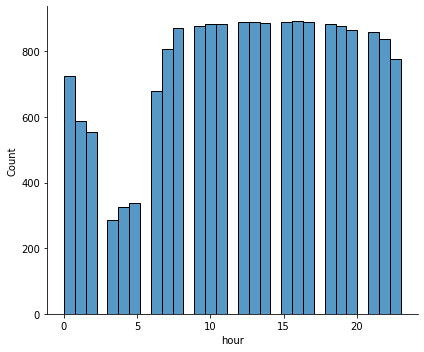

In [ ]:
sns.displot(train["hour"], aspect=1.2)
plt.show()

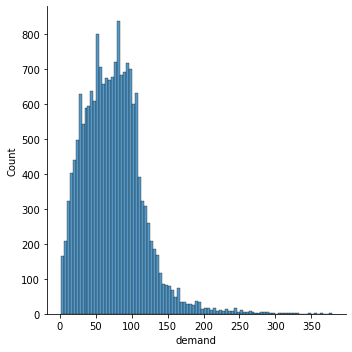

In [ ]:
sns.displot(train["demand"], aspect=1)
plt.show()

In [ ]:
# Feature Extracting 
for i in [train, test]:
    i["year"] = i["date"].dt.year
    i["month"] = i["date"].dt.month_name()
    i["day"] = i["date"].dt.day_name()

In [ ]:
train.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,August,Saturday
1,2018-08-18,10,21,2018,August,Saturday
2,2018-08-18,13,23,2018,August,Saturday
3,2018-08-18,14,104,2018,August,Saturday
4,2018-08-18,15,81,2018,August,Saturday


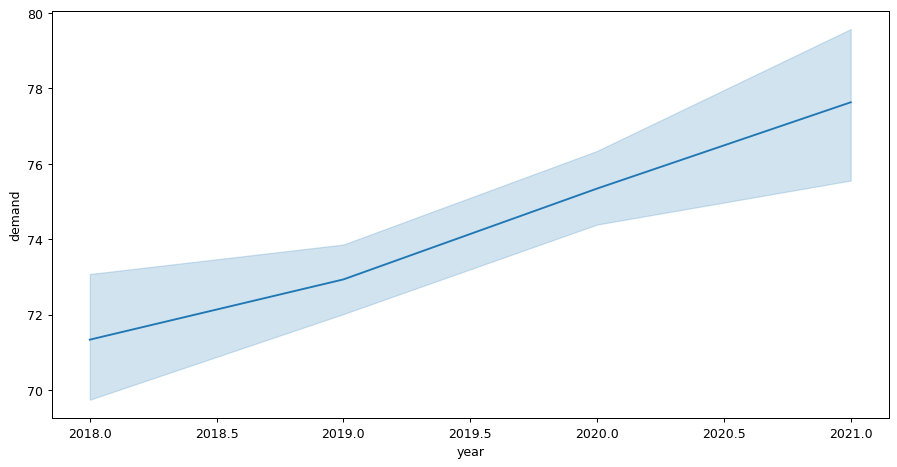

In [ ]:
plt.figure(figsize=(12,6),dpi=90)
sns.lineplot(data=train, x="year", y="demand")
plt.show()

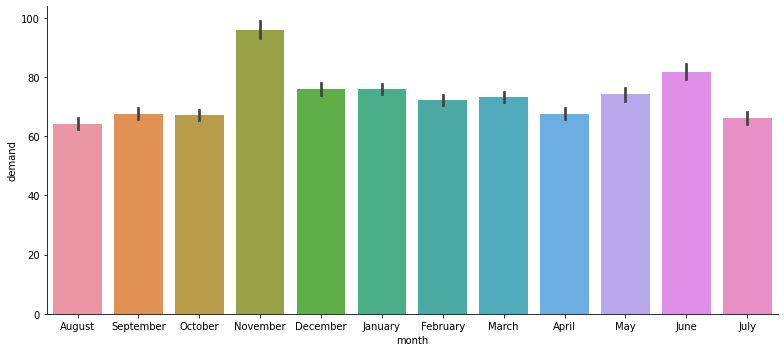

In [ ]:
sns.catplot(data=train, x="month", y="demand", kind="bar", aspect=2.2)
plt.show()

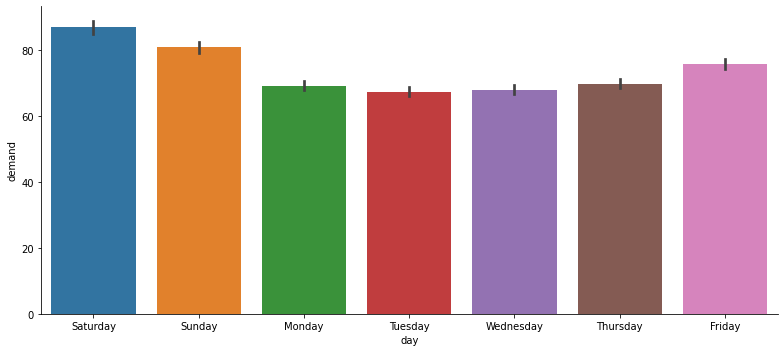

In [ ]:
sns.catplot(data=train, x="day", y="demand", kind="bar", aspect=2.2)
plt.show()

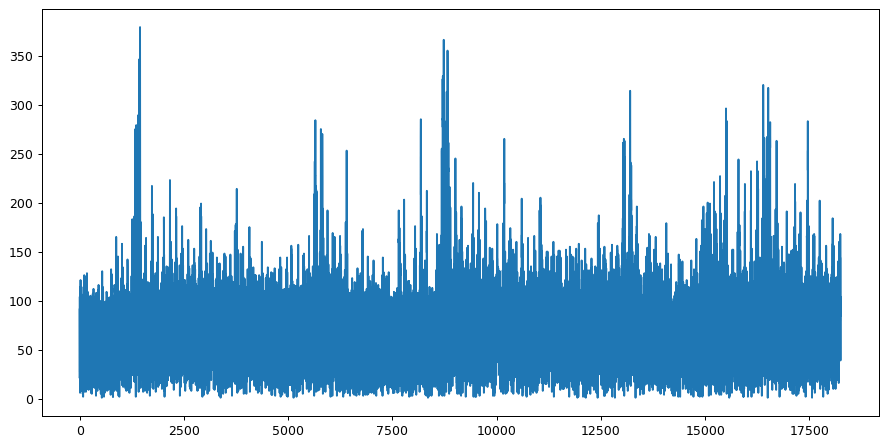

In [ ]:
plt.figure(figsize=(12,6),dpi=90)
plt.plot(train["demand"])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  result = adfuller(dataset, autolag="AIC")
  print(f"ad_test: {result[0]}\np-value: {result[1]}")
  for x,y in result[4].items():
    print(f"critical value: {x}:{y}")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ad_test(train["demand"])

ad_test: -12.543616615314859
p-value: 2.285775462202084e-23
critical value: 1%:-3.430708879572664
critical value: 5%:-2.861698611306604
critical value: 10%:-2.566854424612456


In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    print("\n\n Feature name is : {}\n".format(variable))
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title("Histogram")
    df[variable].hist(bins='auto')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()



 Feature name is : demand



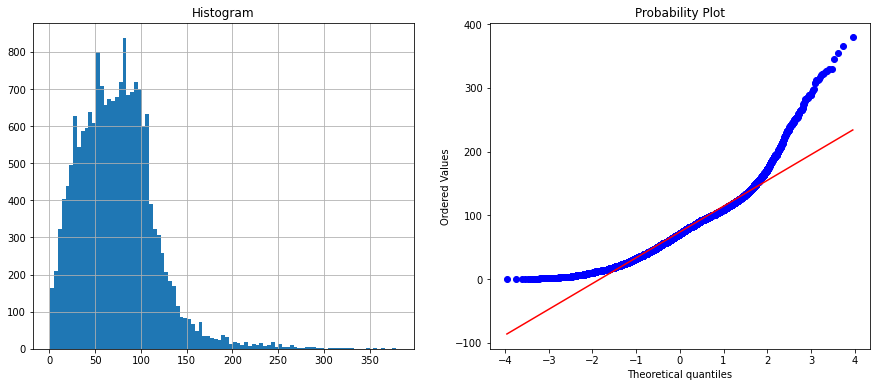

In [ ]:
diagnostic_plots(train, "demand")



 Feature name is : hour



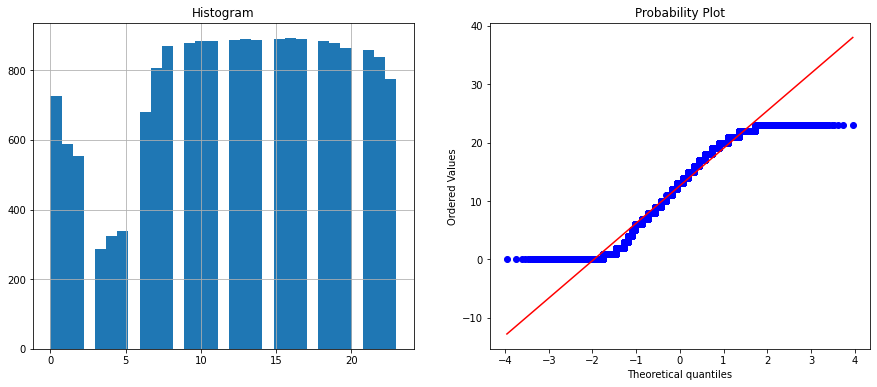

In [ ]:
diagnostic_plots(train, "hour")

In [156]:
df_train = train.copy()
df_test = test.copy()

In [ ]:
df_train.drop(["year","month","day"], axis=1, inplace=True)
df_test.drop(["year","month","day"], axis=1, inplace=True)

In [157]:
for i in [df_train, df_test]:
  i["day"] = i["date"].dt.day
  # i["month"] = i["date"].dt.month
  # i["year"] = i["date"].dt.year
  i["dayofweek"] = i["date"].dt.weekday
  i["week"] = i["date"].dt.week
  i["dayofyear"] = i["date"].dt.dayofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


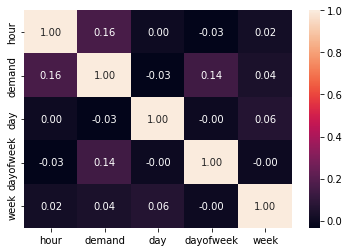

In [118]:
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")

In [158]:
df_train.head()

,date,hour,demand,day,dayofweek,week,dayofyear
0,2018-08-18,9,91,18,5,33,230
1,2018-08-18,10,21,18,5,33,230
2,2018-08-18,13,23,18,5,33,230
3,2018-08-18,14,104,18,5,33,230
4,2018-08-18,15,81,18,5,33,230


In [159]:
df_test.set_index("date", inplace=True)
df_train.set_index("date", inplace=True)

In [160]:
x = df_train.drop(["demand"], axis=1).to_numpy()
y = df_train["demand"].to_numpy()

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(14597, 5)
(3650, 5)
(14597,)
(3650,)


In [162]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [163]:
x_train

array([[-1.17173359, -1.69607158, -0.01238   ,  0.85383641,  0.84625396],
       [-1.7848058 , -1.35380594,  0.48682115,  0.85383641,  0.86437543],
       [ 0.05441084, -0.66927466, -0.51158114,  0.91715344,  0.91873982],
       ...,
       [-0.09885721,  1.15614208, -1.01078228, -1.1089914 , -1.12898582],
       [ 0.97401916, -1.35380594,  0.98602229, -0.53913817, -0.52191672],
       [ 0.97401916, -0.55518611,  0.98602229,  0.0940321 ,  0.10327386]])

In [164]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=7, objective='reg:squarederror', random_state=10)
xgb.fit(x_train, y_train)

XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000,
             objective='reg:squarederror', random_state=10)

In [165]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=10, max_depth=7)
gdb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000,
                          random_state=10)

In [166]:
prediction = xgb.predict(x_test)

In [167]:
prediction2 = gdb.predict(x_test)

In [168]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

print(sqrt(mean_squared_error(y_test, prediction)))
print(sqrt(mean_squared_error(y_test, prediction2)))

32.40107020143781
32.443920487690825


In [ ]:
print(sqrt(mean_squared_error(y_train, prediction)))

27.279047544250936


# test dataset

In [169]:
df_test.head()

,hour,day,dayofweek,week,dayofyear
date,,,,,
2021-03-01,0,1,0,9,60
2021-03-01,1,1,0,9,60
2021-03-01,2,1,0,9,60
2021-03-01,3,1,0,9,60
2021-03-01,5,1,0,9,60


In [170]:
df_test = df_test.to_numpy()

In [171]:
df_test_scaled = scaler.transform(df_test)

In [172]:
df_test_scaled

array([[-1.93807386, -1.69607158, -1.50998343, -1.1089914 , -1.10180362],
       [-1.7848058 , -1.69607158, -1.50998343, -1.1089914 , -1.10180362],
       [-1.63153775, -1.69607158, -1.50998343, -1.1089914 , -1.10180362],
       ...,
       [ 1.28055527,  1.38431917, -1.50998343, -0.8557233 , -0.85716383],
       [ 1.43382333,  1.38431917, -1.50998343, -0.8557233 , -0.85716383],
       [ 1.58709138,  1.38431917, -1.50998343, -0.8557233 , -0.85716383]])

In [173]:
sub_pred = xgb.predict(df_test_scaled)

# submission Data set

In [174]:
sample = pd.read_csv("sample.csv")

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
 2   demand  7650 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 179.4+ KB


In [71]:
len(sub_pred)

7650

In [175]:
sample["demand"] = sub_pred

In [73]:
round(sample["demand"][0])

74

In [102]:
sample["demand"] = sample["demand"].apply(lambda x:round(x))

In [176]:
sample.head()

,date,hour,demand
0,2021-03-01,0,71.235847
1,2021-03-01,1,51.731846
2,2021-03-01,2,51.247124
3,2021-03-01,3,51.326996
4,2021-03-01,5,49.297821


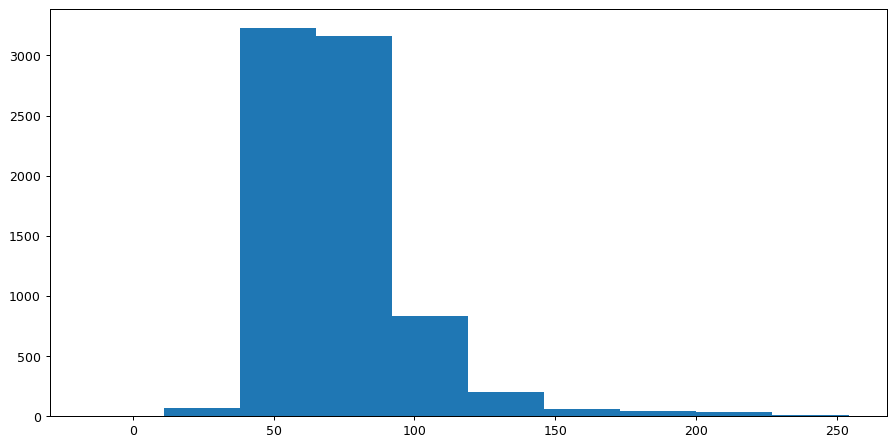

In [177]:
plt.figure(figsize=(12,6),dpi=90)
plt.hist(sample["demand"])
plt.show()

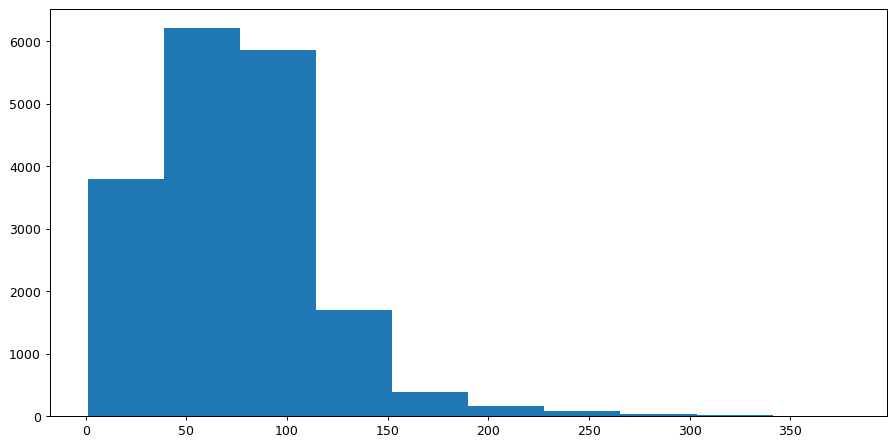

In [77]:
plt.figure(figsize=(12,6),dpi=90)
plt.hist(train["demand"])
plt.show()

In [178]:
sample.to_csv("submission9.csv", index=False)
files.download("submission9.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>